# Project 2: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangle)
- [Exploratory Data Analysis](#eda)
- [Conclusion](#conclusion)


<a id='intro'></a>
## Introduction 

For this project, I used the TMDb movie dataset. The dataset contains 10866 movies collected from the Movie Database (TBDb). The variables in the dataset are: `id`, `imdb_id`, `popularity`, `budget`, `revenue`, `original_title`,`cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`,`runtime`, `genres`, `production_companies`, `release_date`, `vote_count`, `vote_average`, `release_year`, `budget_adj`, `revenue_adj`

I used the data to answer the following questions:  

1. What are the top 10 most popular movies?
2. What are the top 10 most expensive movies made?
3. What are the top 10 highest grossing film?
4. What are the top 10 rated movies?
5. What are the top 10 movies with the longest runtime? 
6. Which genres have the most movies?
7. Which directors have made the most movies?
8. Which actors have filmed the most movies?
9. Which production companies produced the most movies? 
10. What are the trend of movie runtime, budget, revenue, popularity, and votes over the years?
11. Are there any correlations between runtime, budget, revenue, popularity, and vote count?


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

<a id='wrangle'></a>
## Data Wrangling

In this section, I load, check, and clean the data for analysis. 

<a id='descr'></a>
### Data Description

In [2]:
# Load the data 
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Check data type, number of unique values, missing value
temp = {col: [df[col].dtype, df[col].nunique(), df[col].isnull().sum()] for col in df.columns}
temp_df = pd.DataFrame(temp)
temp_df.index = ['data type', 'unique values', 'missing value']
temp_df = temp_df.transpose()
temp_df

,data type,unique values,missing value
id,int64,10865,0
imdb_id,object,10855,10
popularity,float64,10814,0
budget,int64,557,0
revenue,int64,4702,0
original_title,object,10571,0
cast,object,10719,76
homepage,object,2896,7930
director,object,5067,44
tagline,object,7997,2824


In [7]:
# Check for duplicated rows
df.duplicated().sum()

1

#### Observations
> 1. There are 21 columns (some columns contain unnecessary information). 
> 2. There is 1 duplicated row. 
> 3. The datatype of `release_date` is a string.
> 4. There are 0 values in the `budget` and `revenue` columns.

I address these issues in the data cleaning step. 


<a id='cleaning'></a>
### Data Cleaning

I carried out the following data cleaning steps:
1. Drop unnecessary columns - `id`, `imdb_id`, `homepage`, `tagline`, `keywords` and `overview`.
2. Delete dupicate rows
3. Change datatype of column `release_date` to datetime.
4. Drop entires that have `budget`, `revenue`, and `runtime` equal to 0.


#### 1. Drop unnecessary columns

In [8]:
# list of columns that are to be deleted/dropped
cols = ['id', 'imdb_id', 'homepage',  'tagline', 'keywords', 'overview']

# deleting the columns
df.drop(cols, axis = 1, inplace = True)

#checking to see if the columns have been deleted
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 2. Delete duplicate rows 

In [9]:
df.drop_duplicates(inplace=True)

df.shape

(10865, 15)

#### 3. Change datatype of column `release_date` to datetime.

In [10]:
df['release_date'] = pd.to_datetime(df['release_date']) 

df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### 4. Drop entires that have `budget`, `revenue`, and `runtime` equal to 0.

In [11]:
# Make a list of the 3 columns
temp_col = ['budget', 'revenue', 'runtime']

# Replace all the 0 values with NaN
df[temp_col] = df[temp_col].replace(0, np.NAN)

In [12]:
# Drop/ Delete all the NaN values
df.dropna(subset = temp_col, inplace = True)
df.shape

(3854, 15)

In [13]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

#### 1. What are the top 10 most popular movies?

In [14]:
def topten(col):
    df_sorted = pd.DataFrame(df[col].sort_values(ascending=False))[:10]
    df_sorted['original_title'] = df['original_title']
    plt.figure(figsize=(12,6))
    avg = np.mean(df[col])   
    sns.barplot(x=col, y='original_title', data=df_sorted, label=col)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    plt.xlabel(col)
    plt.ylabel('')
    plt.title('Top 10 Movies in ' + col, size=14)
    plt.legend()
    plt.show()

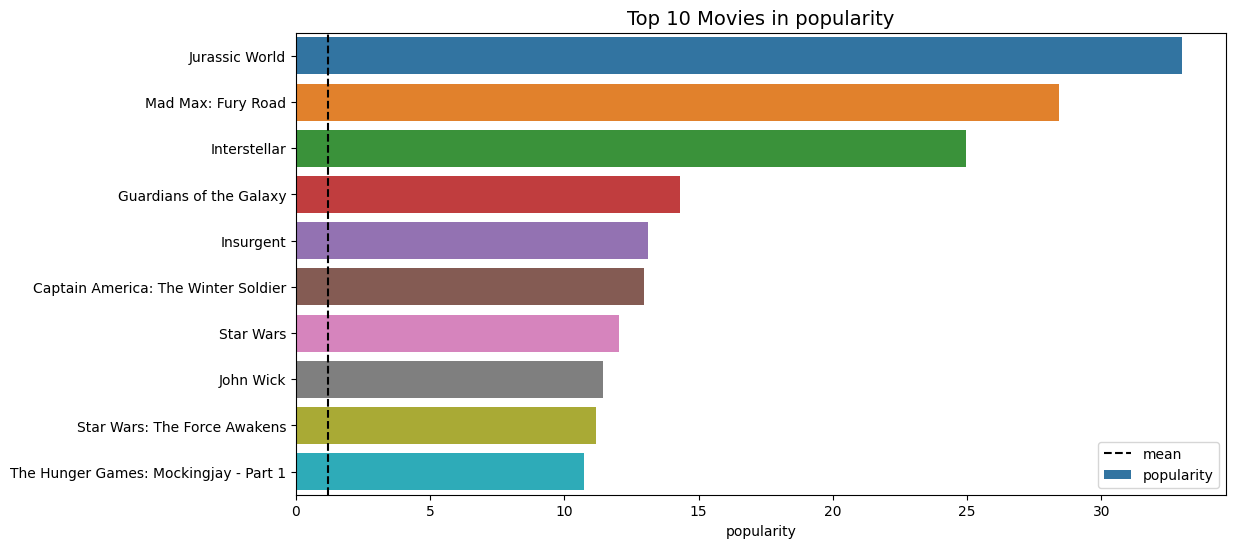

In [15]:
topten('popularity')

#### 2. What are the top 10 most expensive movies made?

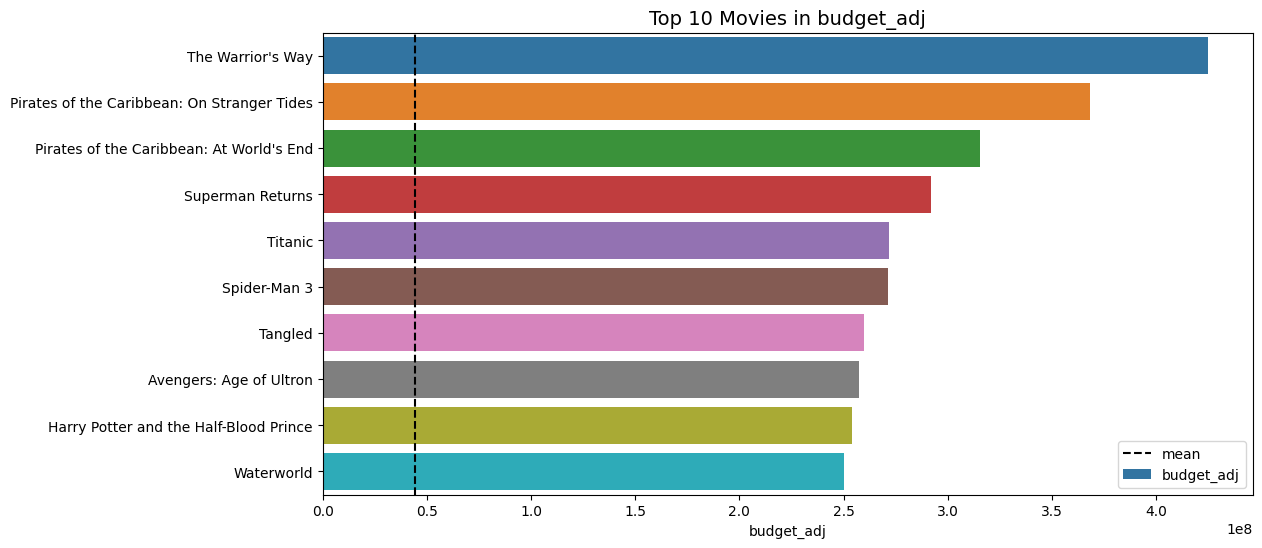

In [16]:
topten('budget_adj')

#### 3. What are the top 10 highest grossing film?

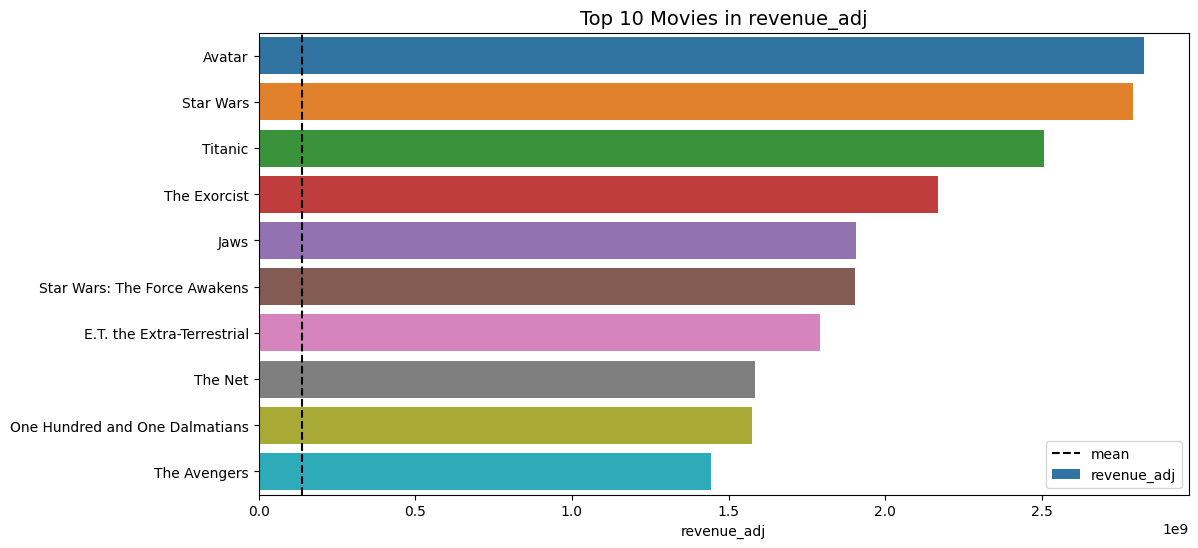

In [17]:
topten('revenue_adj')

#### 4. What are the top 10 rated movies?

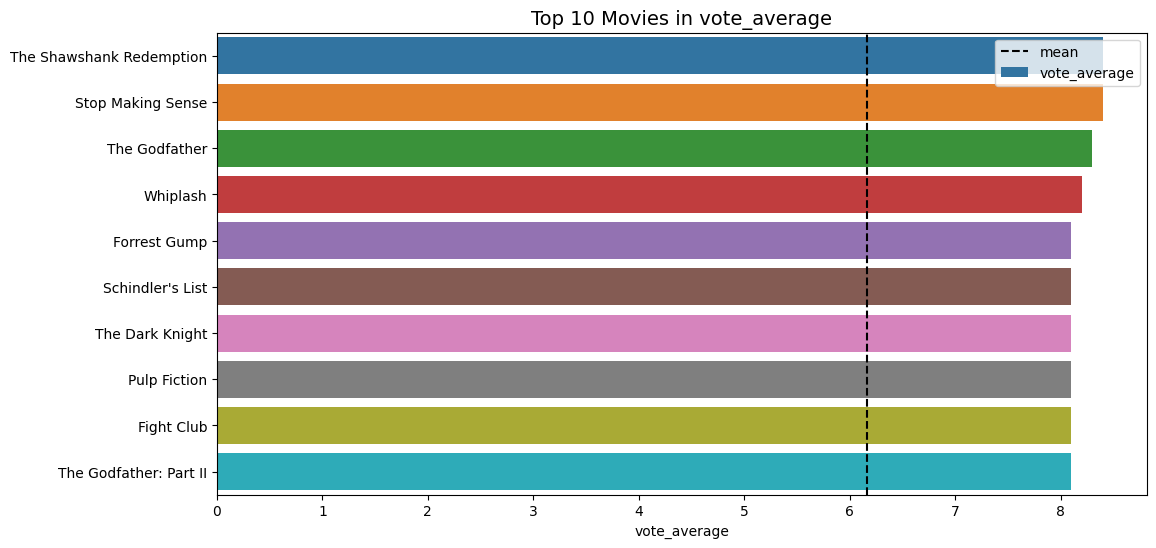

In [18]:
topten('vote_average')

#### 5. What are the top 10 movies with the longest runtime? 

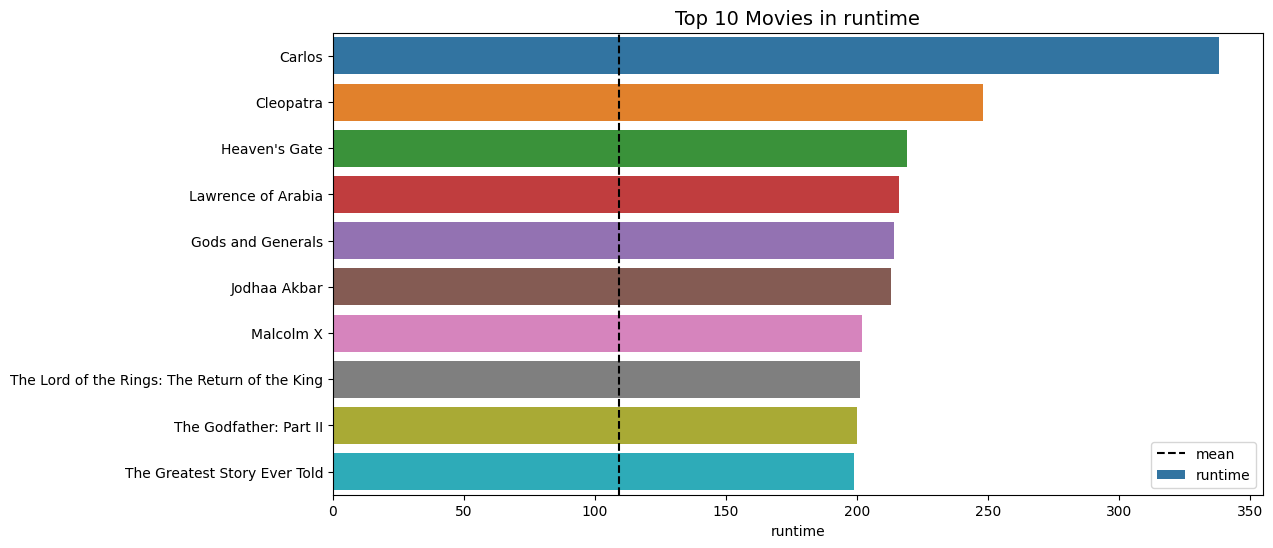

In [19]:
topten('runtime')

#### 6. Which genres have the most movies?

In [20]:
def topten2(col):
    dat = df
    dat[col] = dat[col].str.split('|')
    dat2=dat.explode(col)
    fig=plt.figure(figsize=(12,6))
    ax = sns.countplot(x=col, data=dat2, order=pd.value_counts(dat2[col]).iloc[:10].index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    ax.plot()
    ax.set_ylabel("")
    ax.set_title('Top 10 Movie ' + col, size=14)
    

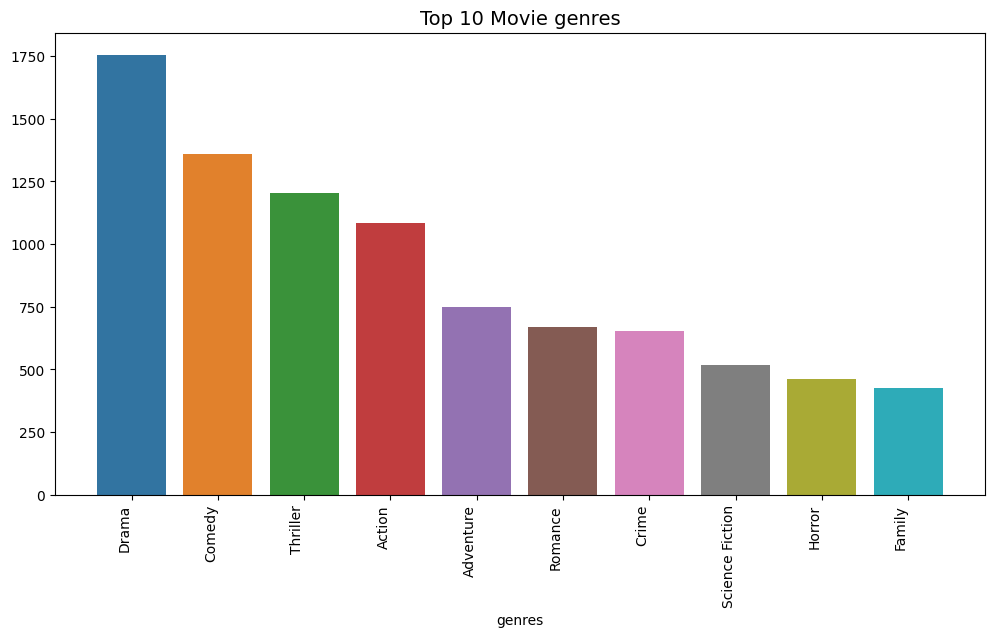

In [21]:
topten2('genres')

#### 7. Which directors have made the most movies?

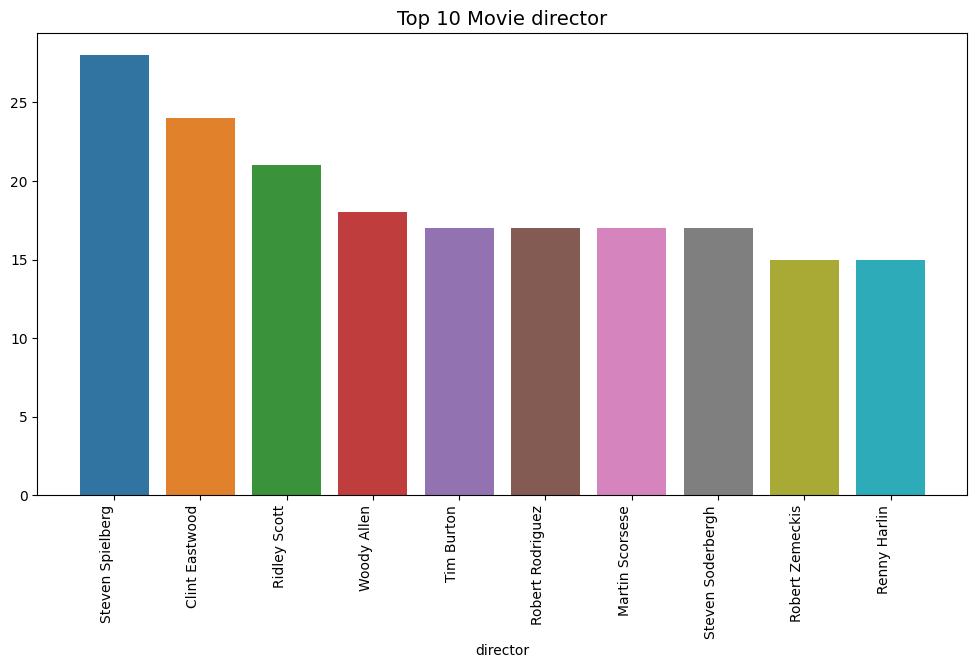

In [22]:
topten2('director')

#### 8. Which actors have filmed the most movies?

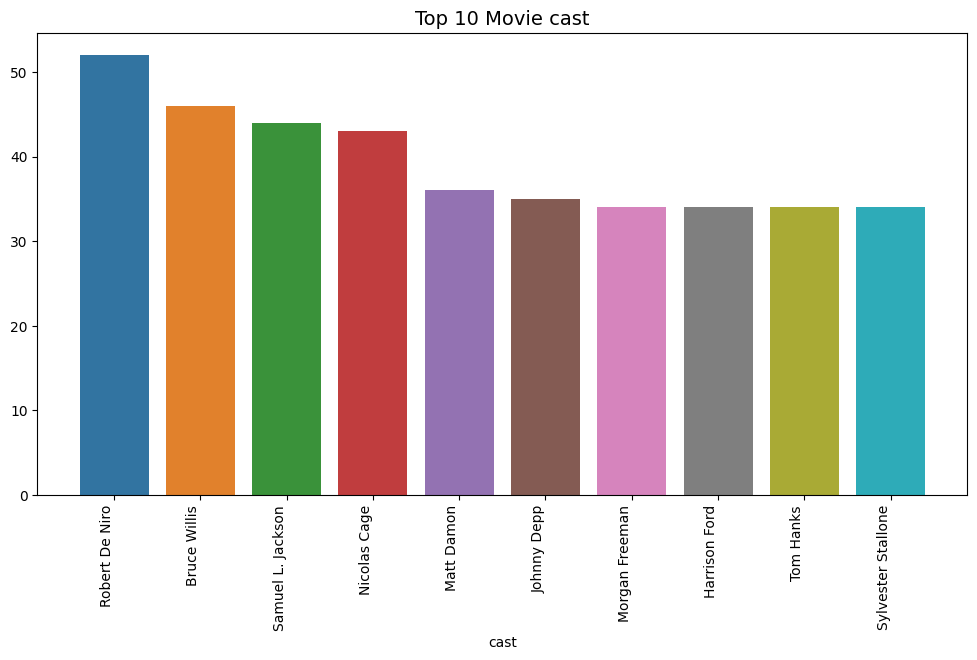

In [23]:
topten2('cast')

#### 9. Which production companies produced the most movies? 

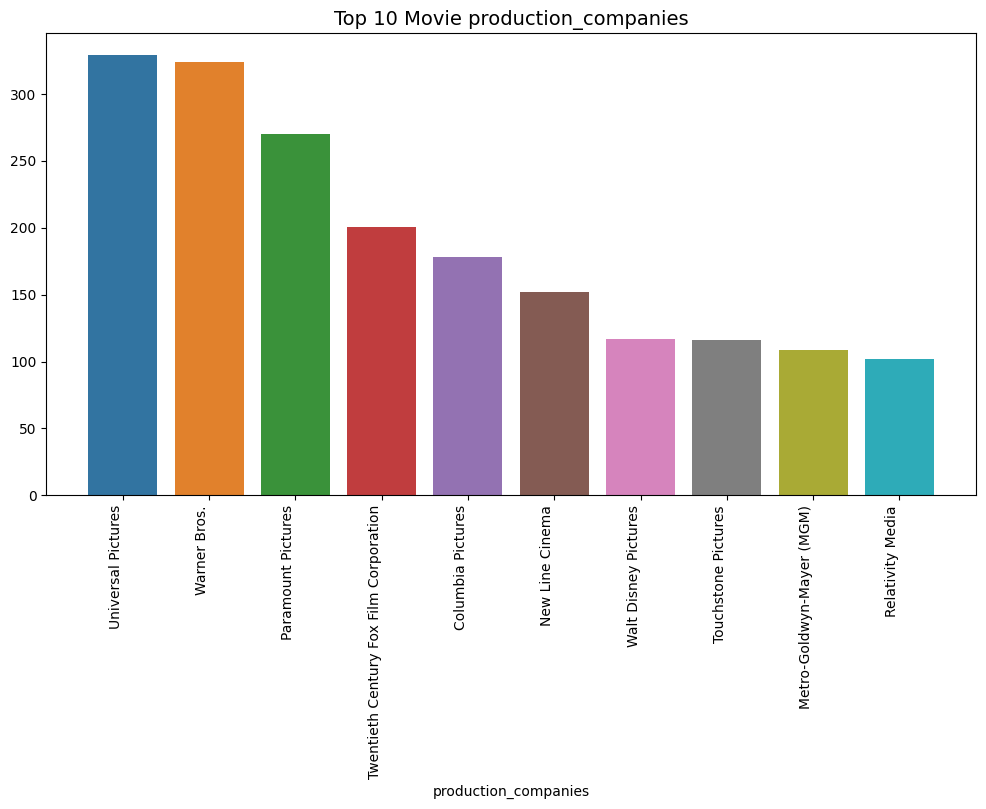

In [24]:
topten2('production_companies')

#### 10 What are the trend of movie runtime, budget, revenue, popularity, and votes over the years?

In [29]:
#Create function to plot variable and moving average (window=10) over time
def plot_trend(col):
    data=df.copy()
    avg = data.groupby('release_year')[col].mean()
    avg2 = avg.rolling(window=10).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(avg, color='black', marker='.', linestyle = 'dashed', label='Original')
    plt.plot(avg2, color='red', label='Running average')
    plt.title('Average ' + col + ' of Movies over the Years', fontsize = 14)
    plt.xlabel('Year', fontsize = 10)
    plt.ylabel(col, fontsize = 10)
    plt.legend()
    plt.show()

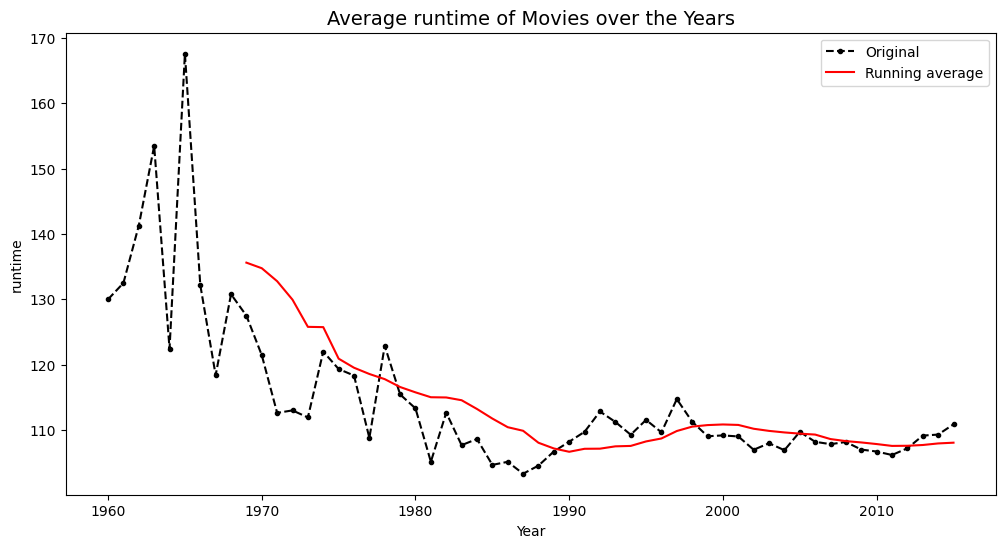

In [ ]:
#Trend of runtime
plot_trend("runtime")

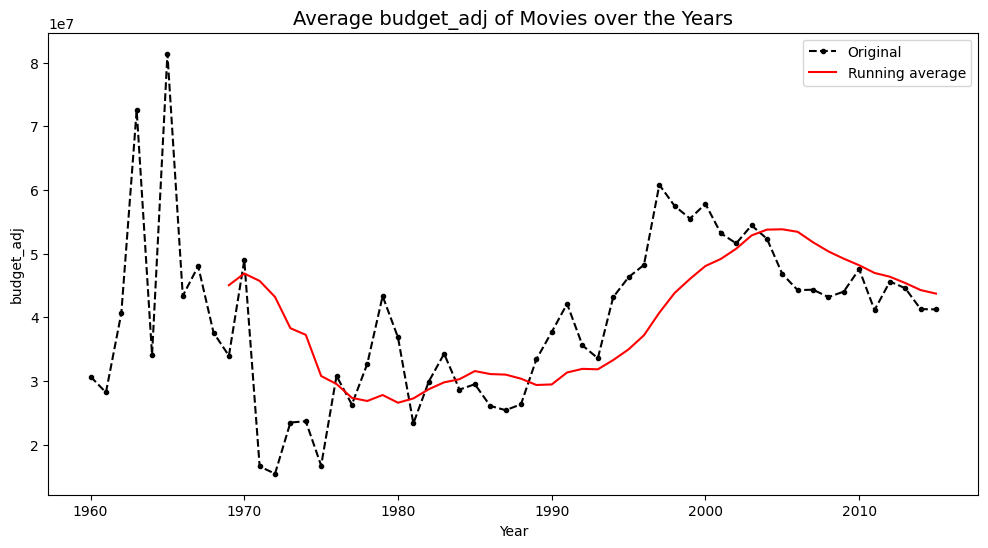

In [31]:
#Trend of budget
plot_trend("budget_adj")

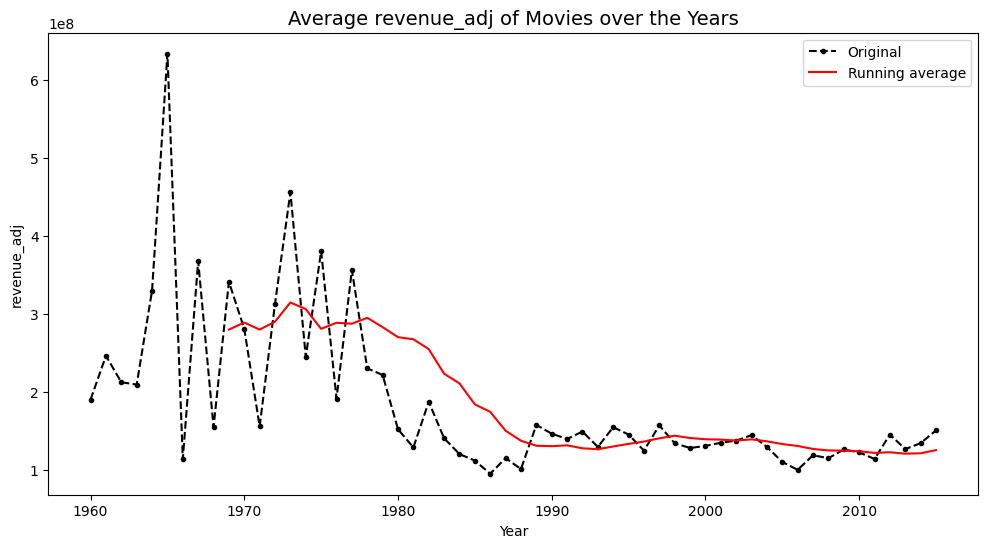

In [32]:
#Trend of revenue
plot_trend("revenue_adj")

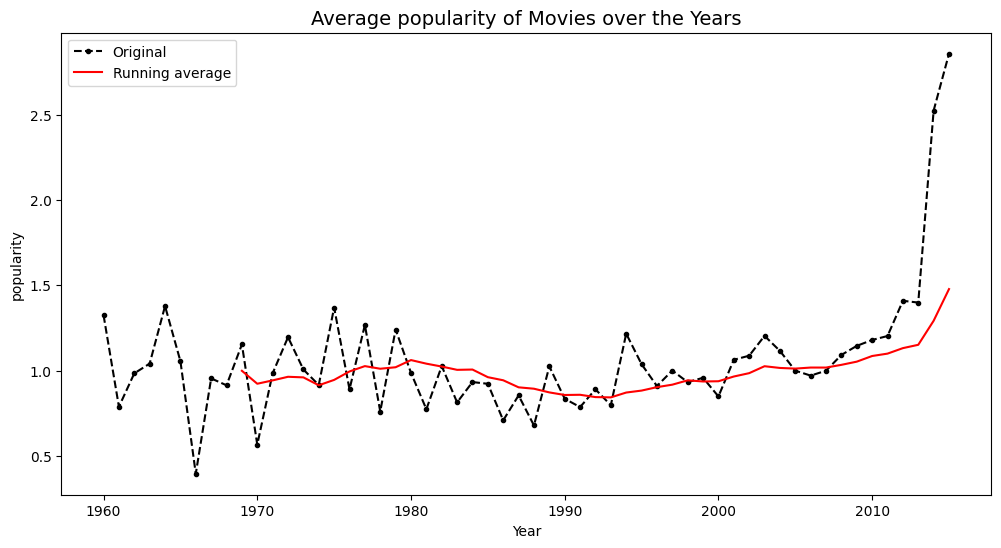

In [33]:
#Trend of popularity
plot_trend("popularity")

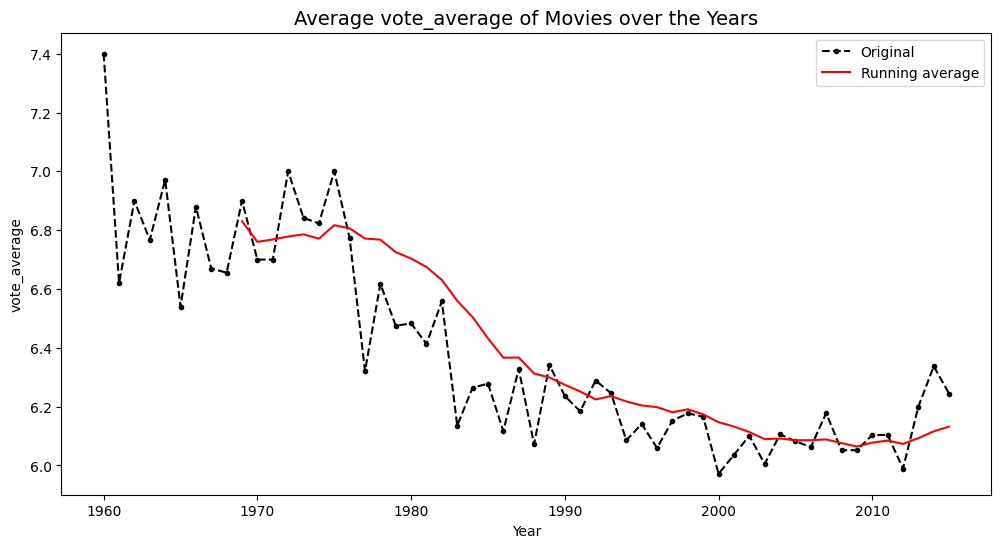

In [34]:
#Trend of vote_avg
plot_trend("vote_average")

#### 11. Are there any correlations between runtime, budget, revenue, popularity, and vote count?

<Figure size 1200x600 with 0 Axes>

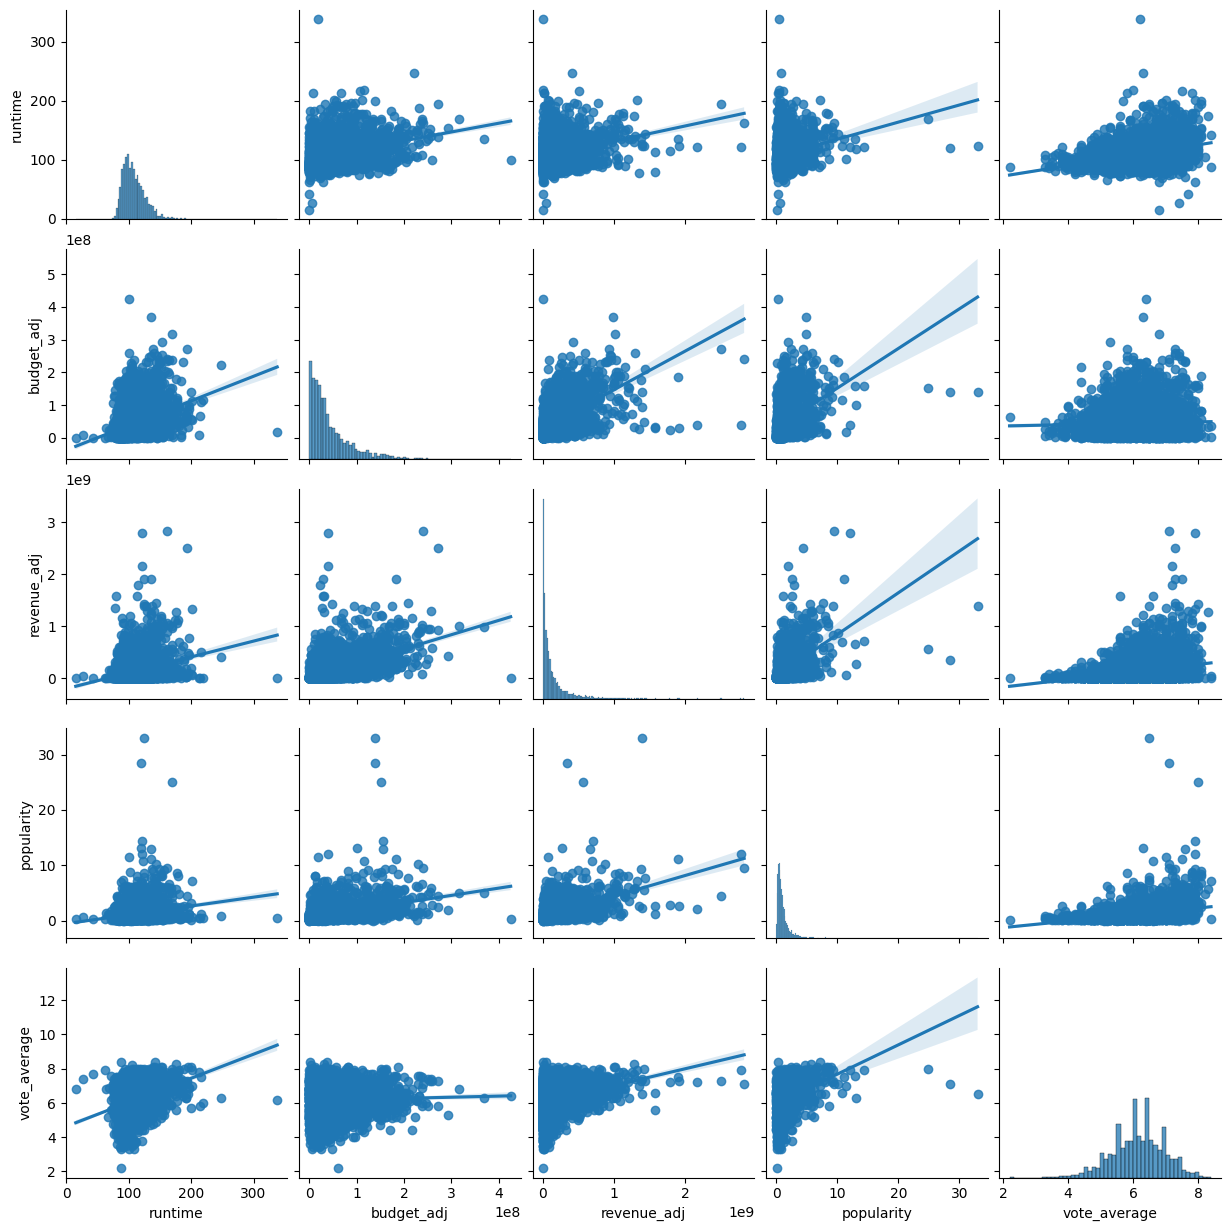

In [44]:
df_corr = df[['runtime', 'budget_adj', 'revenue_adj', 'popularity', 'vote_count']]
plt.figure(figsize=(12,6))
sns.pairplot(df_corr, kind='reg')

<a id='conclusion'></a>
## Conclusion
- The most **popular** movies : *Jurassic World, Mad Max: Fury Road, Interstellar...*
- The most **expensive** movies : *The Warrior's Way, Pirates of the Caribbean, Superman Returns, Titanic...*
- The highest **grossing** movies : *Avatar, Star Wars, Titanic, the Exorcist, Jaws...*
- The highest **rated** movies : *the Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash...*
- The longest **runtime** movies : *Carlos, Cleopatra, Heaven's Gate...*
- The **genres** with the most movies : *drama, comedy, thriller, action...*
- The **directors** that have made the most movies : *Steven Spielberg, Clint Eastwood, Ridly Scoott...*
- The **actors** that have filmed the most movies : *Robert De Niro, Bruce Willis, Samuel L. Jackson...*
- The **production** companies that have produced the most movies : Universal Pictures, Warner Bros, Paramount Pictures...
- The average *runtime, revenue, and vote* of movies have **decreased** over time.
- The average *budget* has **decreased** and then **increased** slightly over time.
- The average *popularity* has **remained constant** over time but *spiked** recently. 
- *Budget vs Revenue, Popularity vs Revenue, Vote count vs Revenue* : strong **positive** correlation. Generally, high budget movies, popular movies, and/or movies with a high vote count result in better revenues. 
- *Budget vs Popularity, Budget vs Revenue, Budget vs Vote count*: strong **positive** correlation. Generally, movies with higher investments result in higher popularity, revenue, and vote count

### Limitations
- The dataset only contains movies that make a sizeable profit (50 million USD).
- Rows with missing values and 0 values were dropped. Therefore, a lot of significant movie data may have been dropped.
- The dataset contained only information about the cast, directors, and the companies. There are a lot crew members (e.g., screenplay writers, editors) who help create the movie, but none of that information was included in the dataset. 